In [1]:
from google.colab import drive
import os
import shutil

drive.mount('/content/drive')
drive_folder = '/content/drive/MyDrive/hackathon_2025'
drive_h5_path = os.path.join(drive_folder, '2k_normalized.h5')

local_h5_path = '/content/2k_normalized.h5'

if os.path.exists(drive_h5_path):
    print(f"File found at: {drive_h5_path}")
    print("Copying to local runtime (this takes a few seconds)...")
    shutil.copy(drive_h5_path, local_h5_path)
    print("Success! Dataset is now at: /content/2k_normalized.h5")
else:
    print(f"ERROR: Could not find file at {drive_h5_path}")

Mounted at /content/drive
File found at: /content/drive/MyDrive/hackathon_2025/2k_normalized.h5
Copying to local runtime (this takes a few seconds)...
Success! Dataset is now at: /content/2k_normalized.h5


In [2]:
#Skip this cell if you dont wanna train the model again
%cd /content/drive/MyDrive/hackathon_2025

!python CMMP.py

/content/drive/MyDrive/hackathon_2025
--- Starting Training on cuda ---
Logs will be saved to: checkpoints_2k/training_log.csv
Initializing Datasets...
Dataset loaded: train split with 18000 samples (1800 unique source images).
Dataset loaded: val split with 2000 samples (200 unique source images).
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 139MB/s]
Epoch 1/200: 100% 36/36 [00:13<00:00,  2.68it/s, loss=0.0359, temp=19.97]
Summary Ep 1: Train 0.0153 | Val 0.0893 | Time 14.7s
>>> New Best Model Saved!
Epoch 2/200: 100% 36/36 [00:07<00:00,  5.13it/s, loss=0.0443, temp=19.97]
Summary Ep 2: Train 0.0132 | Val 0.0632 | Time 8.3s
>>> New Best Model Saved!
Epoch 3/200: 100% 36/36 [00:07<00:00,  4.90it/s, loss=0.0552, temp=19.96]
Summary Ep 3: Train 0.0131 | Val 0.0562 | Time 8.6s
>>> New Best Model Saved!
Epoch 4/200: 100% 36/36 [00:07<00:00,  4.95it/s, loss=0.0433, temp=19.

/content/drive/MyDrive/hackathon_2025
--- Diagnosing Model Health (Full Validation Set) ---
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 245MB/s]


Checkpoint loaded from checkpoints_2k/best.pth
Dataset loaded: val split with 2000 samples (200 unique source images).
Processing 2000 validation samples...


Calculating Similarities: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]



------------------------------------------------
RESULTS (Corrected Logic):
Avg Similarity (Same Physics):      0.1754
Avg Similarity (Different Physics): -0.2330
Signal-to-Noise Gap:                0.4084
------------------------------------------------


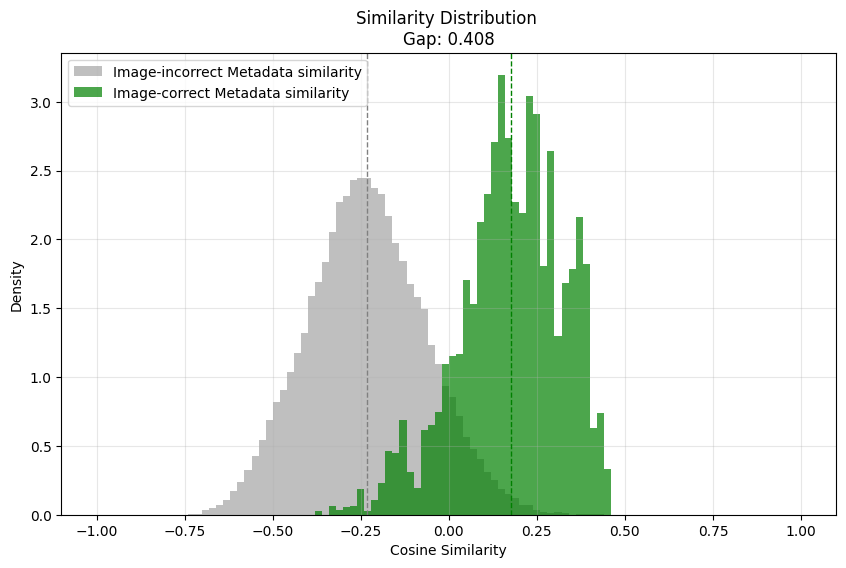

<Figure size 640x480 with 0 Axes>

In [2]:
%cd /content/drive/MyDrive/hackathon_2025
%run separation_performance.py
#we go through the entire validation dataset and log the cosine similarities between all
#encoded metadata vectors and all encoded images
#the similarities are split into two lists, those that correspond to correct image-metadata matches
#, and all the rest. The cosine similarities of the correct matches should be higher than that for
#embedded image vectors compared with the wrong metadata embeddings, then we know the contrastive
#learning works and pushes away metadata vectors that dont fit with the style of the image patch.

/content/drive/MyDrive/hackathon_2025
--- Running Full Metadata Retrieval Demo (Linear) ---
Loading Validation Dataset...
Dataset loaded: val split with 2000 samples (200 unique source images).
Indexing Validation Gallery...
Displaying Results...


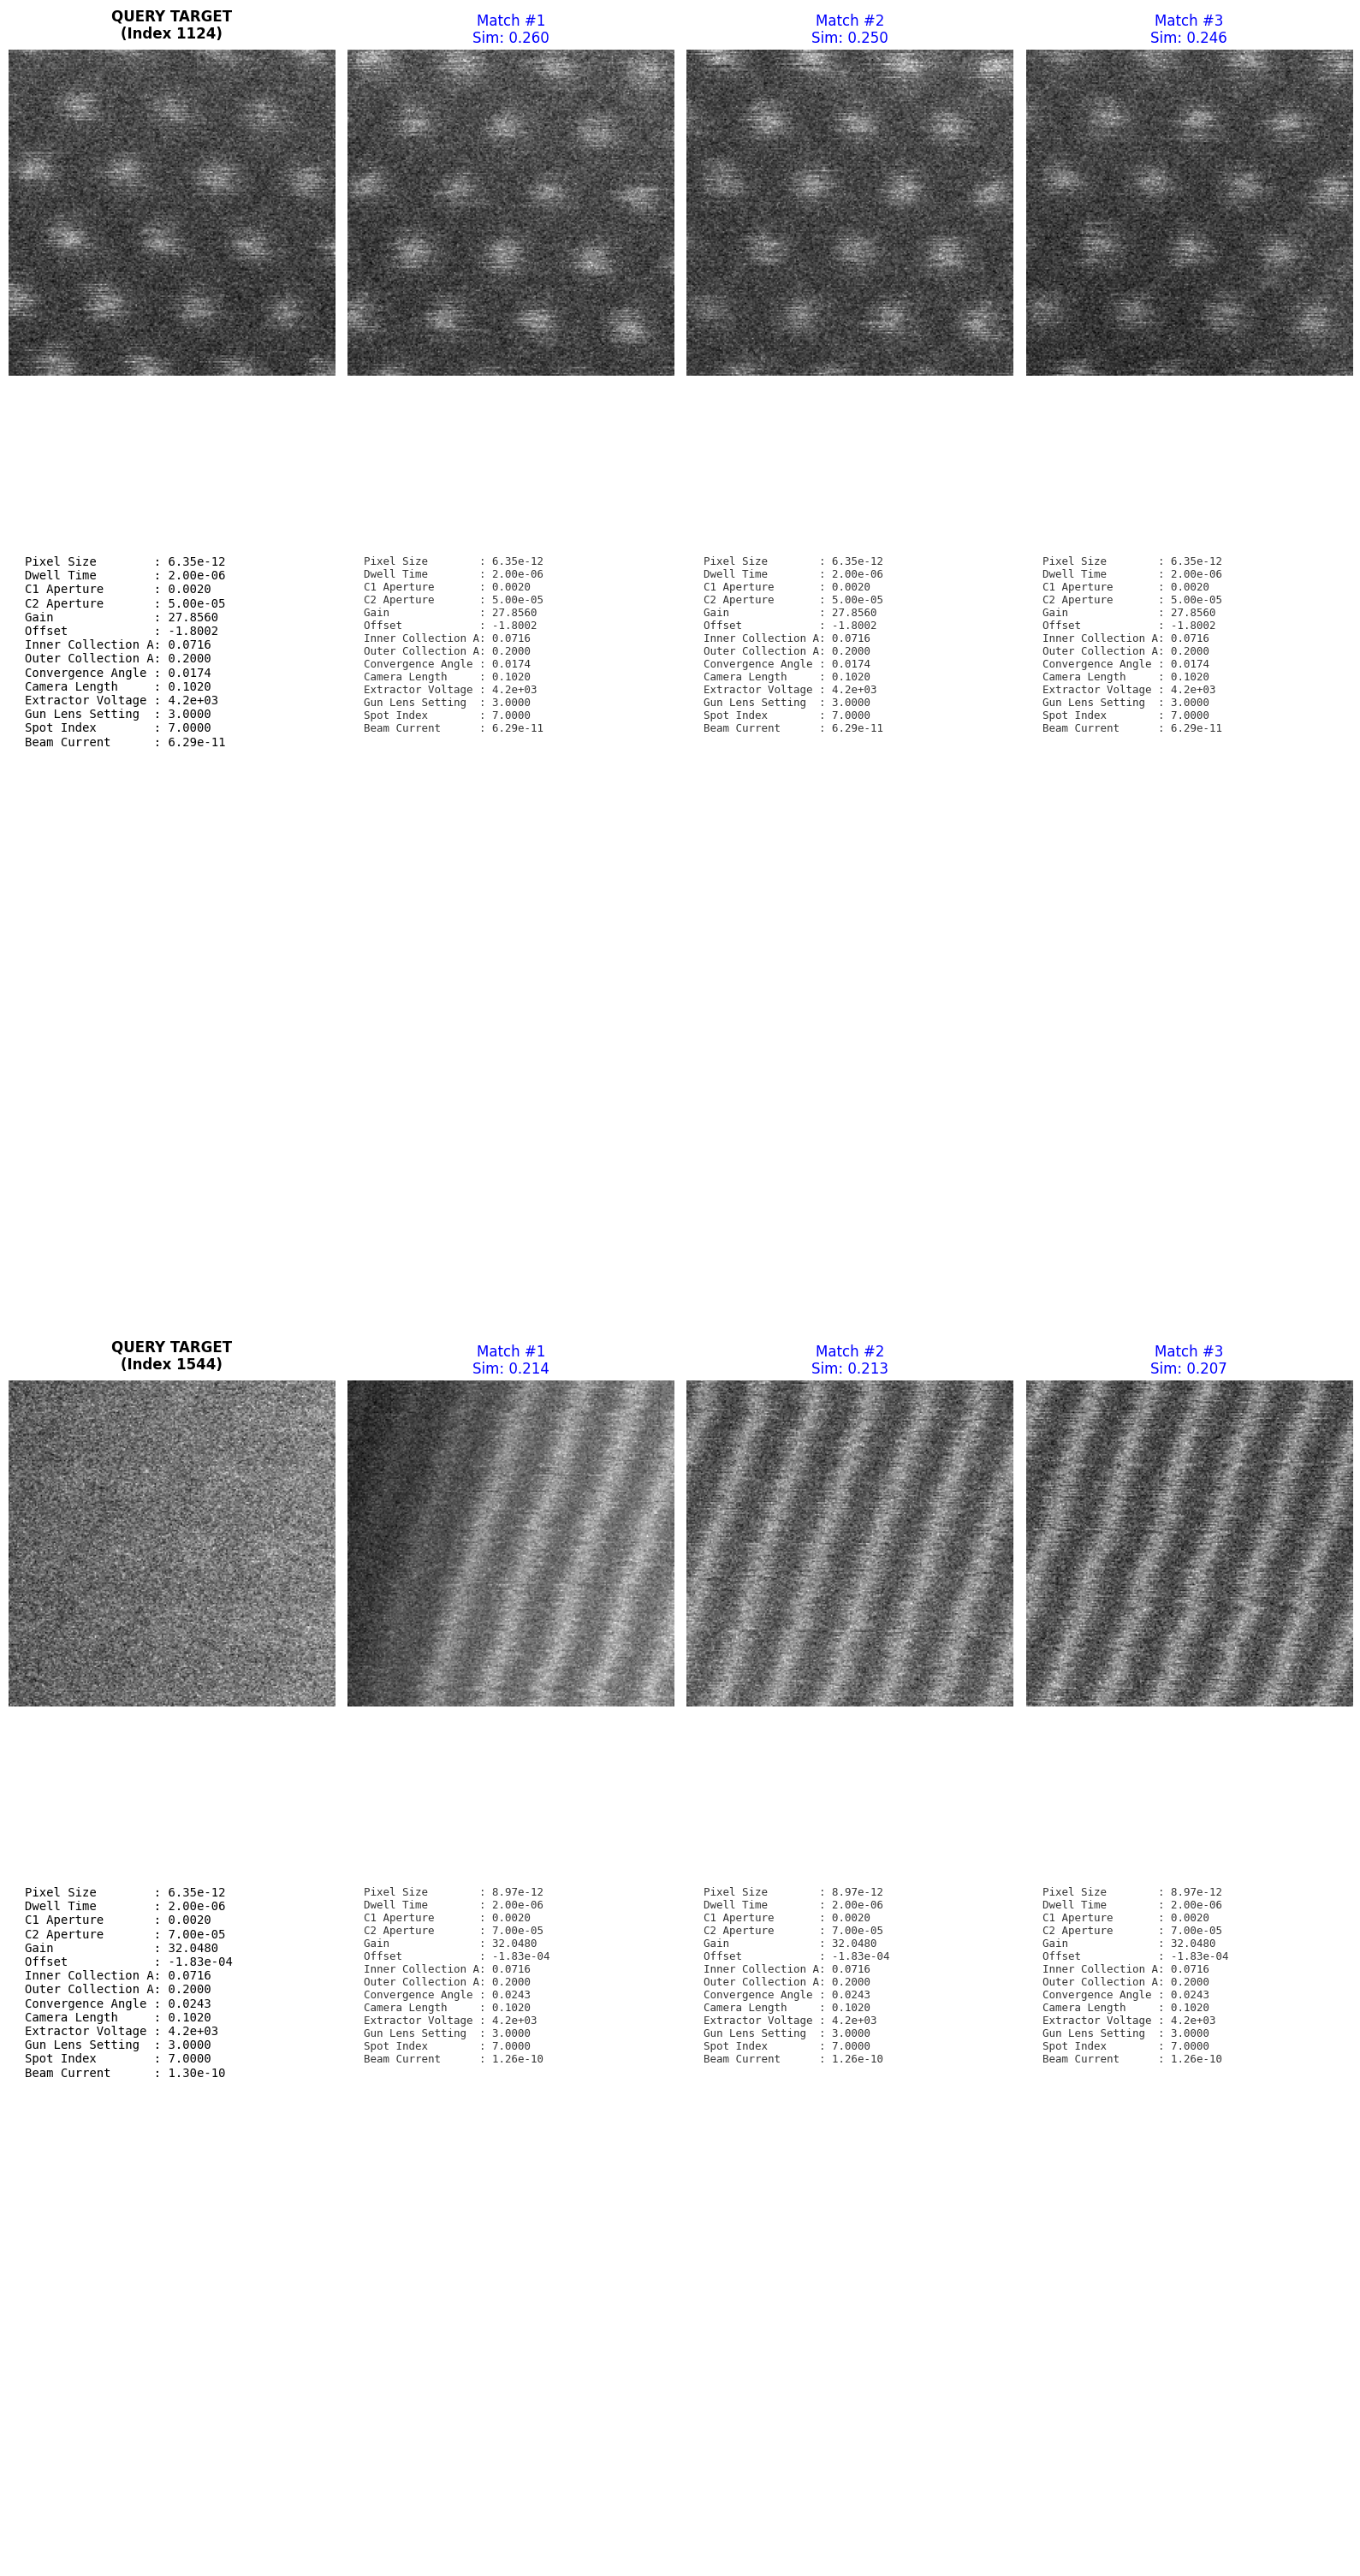

<Figure size 640x480 with 0 Axes>

In [5]:
%cd /content/drive/MyDrive/hackathon_2025
%run retrieval.py
#run several times to see different results
#we select a random metadata vector from the val dataset, it and its paired image is plotted
# to the left. Using the selected metadata, we get the metadata embedding
#we send the validation images through the image encoder
#then compare our selected metadata embedding and find the top 3 closest images in the dataset
#these and their real metadata are plotted in column 2,3,4
#ideally the found images should have the same or similar metadata to the selected metadata.

--- Running Physics Prediction (With Discrete Snapping) ---
Dataset loaded: train split with 18000 samples (1800 unique source images).
Dataset loaded: val split with 2000 samples (200 unique source images).
Building Knowledge Base from Training Data...


100%|██████████| 36/36 [00:09<00:00,  3.61it/s]


Analyzing parameter discreteness...

Predicting on Validation Set...
Snapping predictions to nearest valid physical levels...

---------------- METRICS (Sorted by R2) ----------------
PARAMETER                      | MAPE %     | ACC %      | R2     | TYPE
--------------------------------------------------------------------------------
Pixel Size (m)                 | 69.79%     | N/A        | -0.230  | Continuous
Dwell Time (s)                 | 15.43%     | N/A        | 0.870  | Continuous
C1 Aperture (m)                | 0.66%     | 98.2       | 0.107  | Discrete
C2 Aperture (m)                | 5.27%     | 84.9       | 0.292  | Discrete
Gain                           | 1.73%     | N/A        | 0.929  | Continuous
Offset                         | 0.19%     | N/A        | 0.997  | Continuous
Inner Collection Angle (rad)   | 4.68%     | N/A        | 0.689  | Continuous
Outer Collection Angle (rad)   | 0.00%     | 100.0      | 0.986  | Discrete
Convergence Angle (rad)        | 7.03%   

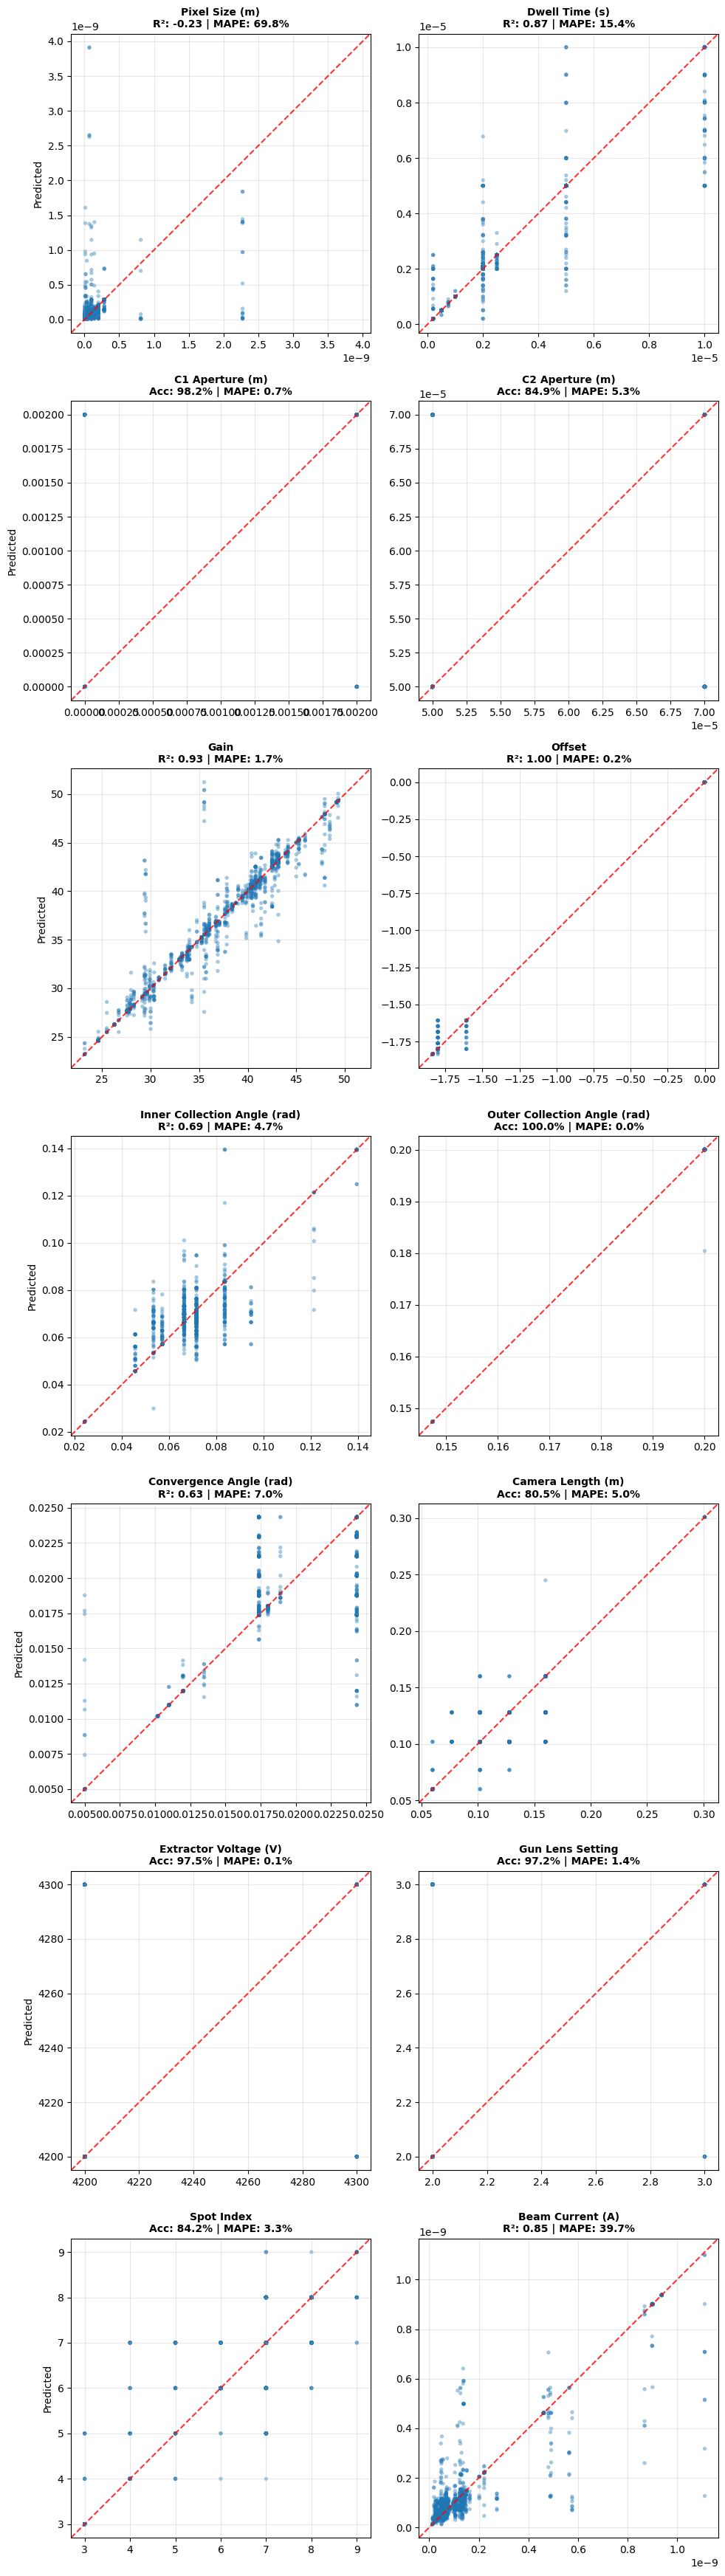

<Figure size 640x480 with 0 Axes>

In [6]:
%run predict_physics.py
#go through the whole validation set and predict the metadata of images by encoding
#the images, finding the 5 most similar embedded metadata vectors (e_m1,e_m2,e_m3,e_m4,e_m5)
# and calculating the metadata of the initial image, m_i, as a weighted average of the real
#metadatas (m1,m2,m3,m4,m5) corresponding to (e_m1,e_m2,e_m3,e_m4,e_m5)
#for certain metadata that are at discrete levels, we snap the predicted metadata to the
#closest discrete level that appears in the full dataset.
#then look at accuracy, r2, and MAPE for each specific metadata